In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Get count matrix 

In [4]:
ex_matrix = pd.read_csv("../data/expression_mat.csv", index_col=0)  # load count matrix 
ex_matrix.shape

(3855, 9751)

In [4]:
ex_matrix

,a,abd-A,Abd-B,Abl,abo,ac,acj6,Acph-1,Act5C,Act42A,...,lncRNA:CR43716,lncRNA:CR44997,asRNA:CR45151,lncRNA:CR45310,lncRNA:CR45425,asRNA:CR45822,asRNA:CR45891,lncRNA:CR45961,lncRNA:CR46032,lncRNA:CR46119
TP1_AACTCAGGTAAATACG,0.0,0.000000,0.0,0.0,0.466624,0.000000,0.0,0.0,2.764117,1.750383,...,0,0,0.0,0,0.0,0.0,0.0,0.0,0,0.0
TP1_TCACGAATCTATCGCC,0.0,1.053208,0.0,0.0,0.000000,0.483831,0.0,0.0,2.879282,1.053208,...,0,0,0.0,0,0.0,0.0,0.0,0.0,0,0.0
TP1_TACGGTACAATAGAGT,0.0,0.813928,0.0,0.0,0.000000,0.000000,0.0,0.0,2.458085,1.059571,...,0,0,0.0,0,0.0,0.0,0.0,0.0,0,0.0
TP1_CAACTAGAGAGACGAA,0.0,0.000000,0.0,0.0,0.000000,0.888313,0.0,0.0,2.728522,2.006819,...,0,0,0.0,0,0.0,0.0,0.0,0.0,0,0.0
TP1_GCGCCAAAGTCGATAA,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,3.294131,1.989672,...,0,0,0.0,0,0.0,0.0,0.0,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TP2.2_AACACGTCATTCACTT,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,2.463590,...,0,0,0.0,0,0.0,0.0,0.0,0.0,0,0.0
TP2.2_TCTTTCCGTACCGTTA,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,3.506908,2.466545,...,0,0,0.0,0,0.0,0.0,0.0,0.0,0,0.0
TP2.2_GATTCAGCACACGCTG,0.0,2.470005,0.0,0.0,0.000000,1.858055,0.0,0.0,3.119940,1.858055,...,0,0,0.0,0,0.0,0.0,0.0,0.0,0,0.0
TP2.2_TGAGCATGTGATGTCT,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,1.854410,2.466052,...,0,0,0.0,0,0.0,0.0,0.0,0.0,0,0.0


### Plot number of genes detected vs. number of cells 

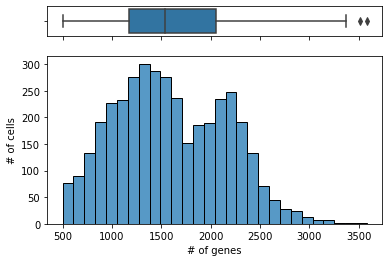

In [19]:
df = ex_matrix.gt(0).sum(axis=1)  # for each cell(line) sum non zero (= expressed) genes 
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(x=df, ax=ax_box)
sns.histplot(data=df, ax=ax_hist)

ax_hist.set(xlabel='# of genes', ylabel='# of cells')

plt.show()


Might be interesting to check for expression by different groups? (i.e. TP)

In [28]:
# df_tp1 = ex_matrix[ex_matrix.loc[ex]]
tp1_idx = [x for x in ex_matrix.index if x.startswith('TP1')]
tp2_idx = [x for x in ex_matrix.index if x.startswith('TP2')]

ex_tp1 = ex_matrix.loc[tp1_idx]
ex_tp2 = ex_matrix.loc[tp2_idx]
# 1788 + 2067 = 3855


#### Cells vs. Genes - TP1

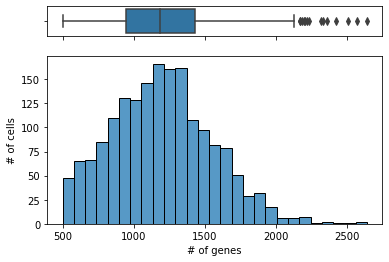

In [21]:
df = ex_tp1.gt(0).sum(axis=1)  # for each cell(line) sum non zero (= expressed) genes 
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(x=df, ax=ax_box)
sns.histplot(data=df, ax=ax_hist)

ax_hist.set(xlabel='# of genes', ylabel='# of cells')

plt.show()

#### Cells vs. Genes - TP2

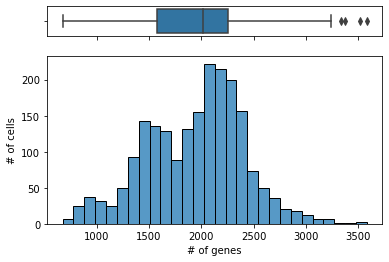

In [22]:
df = ex_tp2.gt(0).sum(axis=1)  # for each cell(line) sum non zero (= expressed) genes 
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(x=df, ax=ax_box)
sns.histplot(data=df, ax=ax_hist)

ax_hist.set(xlabel='# of genes', ylabel='# of cells')

plt.show()